# Центральная предельная теорема

## Для выполнения задания использовано распределение LogNorm

A lognormal continuous random variable.

As an instance of the rv_continuous class, lognorm object inherits from it a collection of generic methods (see below for the full list), and completes them with details specific for this particular distribution.

\begin{eqnarray}
f(x,s) &=& \frac{1}{sx\sqrt{{2\pi}}}{exp(\frac{log^2(x)}{2s^2})}\\
\\
\end{eqnarray}
for  x > 0, s > 0

### Импортирование библиотек

In [379]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline
np.random.seed(42)

### Настройка параметров распределения

In [380]:
# параметры ЛогНорм распределения
sigma = 0.859455801705594
mu = 0.418749176686875
loc = 0
scale = math.exp(mu)

# frozen distribution
rv = sts.lognorm(s=sigma, loc=loc, scale=scale)

# сгенерируем 1000 значений
rv_sample = rv.rvs(1000)

print('Theoretical mean: ', rv.mean())
print('Theoretical standard deviation: ', rv.std())
print('Theoretical variance: ', rv.var())

Theoretical mean:  2.199172854035945
Theoretical standard deviation:  2.299306251942209
Theoretical variance:  5.28680924022053


### Построим гистограмму выборки и теоретическое распределение

Text(0, 0.5, 'pdf')

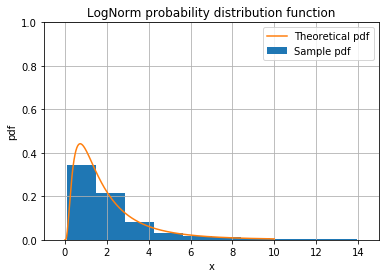

In [381]:
# гистограмма выборки
plt.hist(rv_sample, bins=30, density=True, label='Sample pdf')

# теоретическая плотность распределения
x = np.linspace(0,10,1000)
pdf = rv.pdf(x)
plt.plot(x, pdf, label='Theoretical pdf')
plt.legend()
plt.grid()
plt.axis([-1, 15, 0, 1])
plt.title('LogNorm probability distribution function')
plt.xlabel('x')
plt.ylabel('pdf')

### Сгененрируем тысячу выборок разных объемов

In [382]:
#количество выборок
sample_num = 1000

#массив объёма выборок
sample_volume = [1, 5, 15, 50]

# массив под выборочные средние значения
distribution_samples = np.zeros((len(sample_volume), sample_num))

# вычисление выборочных средних значений
for i in range(len(sample_volume)):
    for j in range(sample_num):
        distribution_sample_temp = np.array(sts.lognorm.rvs(s=sigma, loc=loc, scale=scale, size=sample_volume[i]) )
        distribution_sample_temp_mean = distribution_sample_temp.mean()
        distribution_samples[i, j] = distribution_sample_temp_mean
        
print(distribution_samples)

[[5.06033823 3.36501008 1.59999234 ... 0.712352   1.32127916 0.80134659]
 [0.88555498 2.03640435 1.14684722 ... 2.70123962 2.82625462 1.74828402]
 [2.99238553 2.23968338 1.7714306  ... 1.38065715 2.3011847  2.36973492]
 [1.99170775 2.22085797 1.82808197 ... 1.80540377 1.86303297 1.55894653]]


### Гистограмки

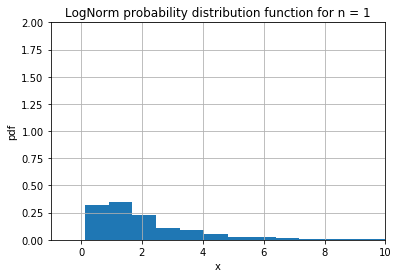

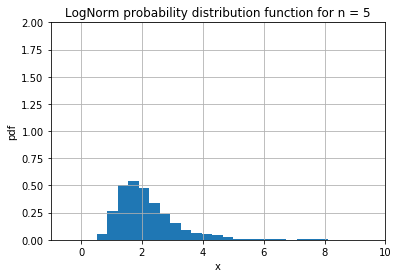

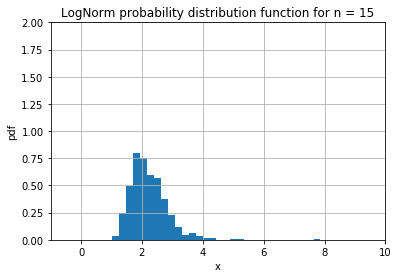

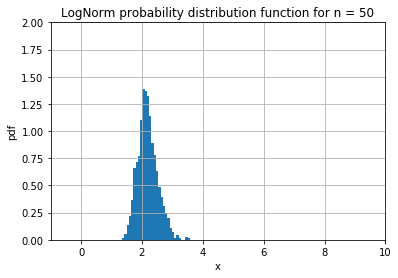

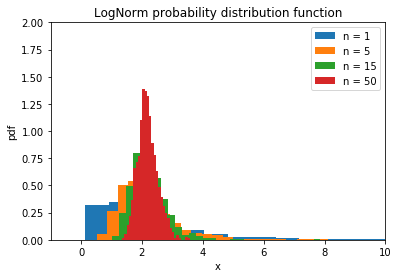

In [383]:
#гистограммы выборки
for i in range(len(sample_volume)):
    plt.hist(distribution_samples[i], bins=30, density=True)
    plt.grid()
    plt.axis([-1, 10, 0, 2])
    plt.title('LogNorm probability distribution function for n = ' + str(sample_volume[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')
    plt.show()
    
for i in range(len(sample_volume)):
    plt.hist(distribution_samples[i], bins=30, density=True, label='n = ' + str(sample_volume[i]))
    plt.grid()
    plt.axis([-1, 10, 0, 2])
    plt.title('LogNorm probability distribution function')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')

### Матожидание и дисперсия

In [384]:
#Математическое ожидание и дисперсия

distribution_sample_mean = math.exp(mu + sigma**2 / 2)
# distribution_sample_mean = math.exp(len(sample_volume)*mu + len(sample_volume)**2 * s**2 / 2)
distribution_sample_variance = np.zeros(len(sample_volume))
for i in range(len(sample_volume)):
    distribution_sample_variance[i] = math.exp(2 * mu + sigma**2) * (math.exp(sigma**2) - 1) / sample_volume[i]
    
print('Математическое ожидание: ' + str(distribution_sample_mean))
for i in range(len(sample_volume)):
    print('Дисперсия для n = ' + str(sample_volume[i]) + ': ' + str(distribution_sample_variance[i]))

Математическое ожидание: 2.199172854035945
Дисперсия для n = 1: 5.286809240220529
Дисперсия для n = 5: 1.0573618480441058
Дисперсия для n = 15: 0.35245394934803526
Дисперсия для n = 50: 0.10573618480441058


### А теперь сравним соответствуют ли наши выборочные средние нормальному распределению

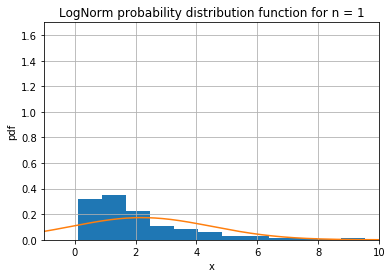

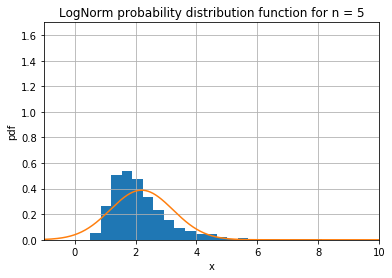

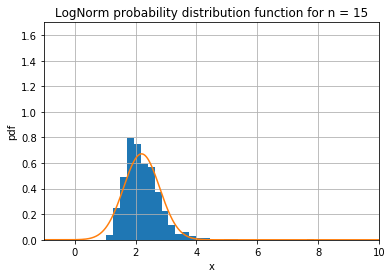

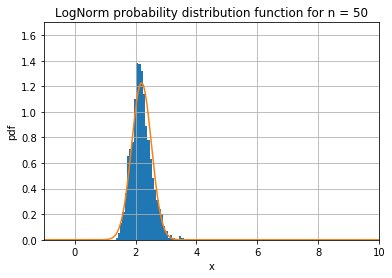

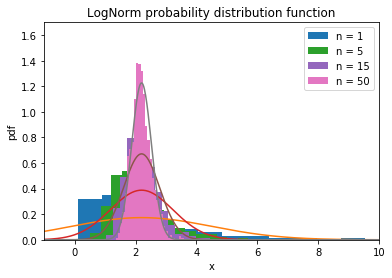

In [385]:
#гистограммы выборки
for i in range(len(sample_volume)):
    plt.hist(distribution_samples[i], bins=30, density=True)
    plt.grid()
    plt.axis([-1, 10, 0, 1.7])
    plt.title('LogNorm probability distribution function for n = ' + str(sample_volume[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')
    
    # зададим нормально распределенную случайную величину
    mu = distribution_sample_mean
    sigma = math.sqrt(distribution_sample_variance[i])
    normRv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(-10,10,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf)
    plt.show()
    
for i in range(len(sample_volume)):
    plt.hist(distribution_samples[i], bins=30, density=True, label='n = ' + str(sample_volume[i]))
    plt.grid()
    plt.axis([-1, 10, 0, 1.7])
    plt.title('LogNorm probability distribution function')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')
    
    # зададим нормально распределенную случайную величину
    mu = distribution_sample_mean
    sigma = math.sqrt(distribution_sample_variance[i])
    normRv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(-10,10,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf)

## Спасибо за внимание! Вывод:

### Чем больше n, тем сильнее распределение принимает вид нормального